In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
import nltk

In [2]:
# Load spreadsheet
news = pd.ExcelFile('news.xlsx')
# Load a sheet into a DataFrame by its name
news = news.parse('Sheet1')

In [3]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [4]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()

# Function to process headlines with lemmatization
def pre_processing_by_nltk(doc, lemmatize=True):
    # Tokenize the document
    tokens = word_tokenize(doc)
    # Apply lemmatization if specified
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Convert tokens to lowercase
    return [w.lower() for w in tokens]

In [5]:
#create anew column with pre_processin
pre_processing_by_nltk(news['Headline'][1])

['pence',
 'say',
 'he',
 '‘',
 'can',
 'not',
 'in',
 'good',
 'conscience',
 '’',
 'endorse',
 'trump']

In [6]:
news['processed_headline'] = news['Headline'].apply(pre_processing_by_nltk)

In [7]:
news.head()

,Date,Standing,Topic,Agency,Headline,URL,processed_headline
0,2024-03-15,Left,1,NYT,"Pence Says He Won’t Endorse Trump, but Won’t V...",https://www.nytimes.com/2024/03/15/us/politics...,"[pence, says, he, won, ’, t, endorse, trump, ,..."
1,2024-03-15,Left,1,CNN,Pence says he ‘cannot in good conscience’ endo...,https://www.cnn.com/2024/03/15/politics/pence-...,"[pence, say, he, ‘, can, not, in, good, consci..."
2,2024-03-15,Right,1,Fox,"Pence declines to endorse Trump, won't back Biden",https://www.fox5dc.com/news/pence-declines-to-...,"[pence, decline, to, endorse, trump, ,, wo, n'..."
3,2024-03-15,Right,1,NewsMax,Mike Pence Declines to Endorse Trump for Presi...,https://www.newsmax.com/newsfront/mike-pence-e...,"[mike, pence, declines, to, endorse, trump, fo..."
4,2022-06-24,Left,2,NYT,"In 6-to-3 Ruling, Supreme Court Ends Nearly 50...",https://www.nytimes.com/2022/06/24/us/roe-wade...,"[in, 6-to-3, ruling, ,, supreme, court, ends, ..."


In [8]:
#filter the table by extracting just the Standing, topic and processed_headline
#note, topic column has a empty space after it
#remove the empty space
news.rename(columns={'Topic ': 'Topic'}, inplace=True)
text_news = news[['Agency', 'Topic', 'Headline','processed_headline']]
text_news

,Agency,Topic,Headline,processed_headline
0,NYT,1,"Pence Says He Won’t Endorse Trump, but Won’t V...","[pence, says, he, won, ’, t, endorse, trump, ,..."
1,CNN,1,Pence says he ‘cannot in good conscience’ endo...,"[pence, say, he, ‘, can, not, in, good, consci..."
2,Fox,1,"Pence declines to endorse Trump, won't back Biden","[pence, decline, to, endorse, trump, ,, wo, n'..."
3,NewsMax,1,Mike Pence Declines to Endorse Trump for Presi...,"[mike, pence, declines, to, endorse, trump, fo..."
4,NYT,2,"In 6-to-3 Ruling, Supreme Court Ends Nearly 50...","[in, 6-to-3, ruling, ,, supreme, court, ends, ..."
5,Fox,2,Supreme Court overturns Roe v. Wade in landmar...,"[supreme, court, overturn, roe, v., wade, in, ..."
6,CNN,2,Supreme Court officially transmits its judgmen...,"[supreme, court, officially, transmits, it, ju..."
7,NewsMax,2,US Supreme Court Overturns Roe v. Wade,"[us, supreme, court, overturns, roe, v., wade]"
8,NYT,3,"House Passes G.O.P. Energy Bill, Pushing to Ro...","[house, passes, g.o.p, ., energy, bill, ,, pus..."
9,NewsMax,3,"House GOP Passes Lower Energy Costs Bill, Poss...","[house, gop, passes, lower, energy, costs, bil..."


Cosing similarity with word2vec

In [9]:
from numpy.linalg import norm

def sentence_vector(words, mod):
    # Filter out words not in the model's vocabulary
    word_vectors = [mod[word] for word in words if word in mod]
    # Handle case where sentence contains no valid words after preprocessing
    if len(word_vectors) == 0:
        return np.zeros(mod.vector_size)
    # Return the average vector
    return np.mean(word_vectors, axis=0)

def cosine_similarity(vec1, vec2):
    # Calculate the cosine similarity between two vectors
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def similarity_score(text1, text2, mod):
    # Get the sentence vectors for the two lists of words
    vec1 = sentence_vector(text1, mod)
    vec2 = sentence_vector(text2, mod)
    # Calculate and return the cosine similarity
    return cosine_similarity(vec1, vec2)




Few comparisions

In [10]:
# Example , compare the similarity between two headlines in topic 1

text1 = text_news['processed_headline'][0]
text2 = text_news['processed_headline'][1]
similarity = similarity_score(text1, text2, wv)
print(f"liberal Similarity score: {similarity}")

text1 = text_news['processed_headline'][2]
text2 = text_news['processed_headline'][3]
similarity = similarity_score(text1, text2, wv)
print(f"conservative Similarity score: {similarity}") 

text1 = text_news['processed_headline'][0]
text2 = text_news['processed_headline'][2]
similarity = similarity_score(text1, text2, wv)
print(f"NYT vs Fox Similarity score: {similarity}") 

text1 = text_news['processed_headline'][0]
text2 = text_news['processed_headline'][3]
similarity = similarity_score(text1, text2, wv)
print(f"NYT vs NewsMax Similarity score: {similarity}") 

text1 = text_news['processed_headline'][1]
text2 = text_news['processed_headline'][2]
similarity = similarity_score(text1, text2, wv)
print(f"CNN vs Fox: {similarity}") 

text1 = text_news['processed_headline'][1]
text2 = text_news['processed_headline'][3]
similarity = similarity_score(text1, text2, wv)
print(f"CNN vs NewsMax Similarity score: {similarity}") 

liberal Similarity score: 0.7776579260826111
conservative Similarity score: 0.7213330268859863
NYT vs Fox Similarity score: 0.7396389245986938
NYT vs NewsMax Similarity score: 0.6803765296936035
CNN vs Fox: 0.6739659905433655
CNN vs NewsMax Similarity score: 0.7178555727005005


In [11]:
scores = []

for i in range(1, 10):  # Assuming topics range from 1 to 9
    sub_data = text_news[text_news['Topic'] == i]
    agencies = sub_data['Agency'].unique()
    
    # Iterate over pairs of agencies
    for j in range(len(agencies)):
        for k in range(j + 1, len(agencies)):
            agency1 = agencies[j]
            agency2 = agencies[k]
            text1 = sub_data[sub_data['Agency'] == agency1]['processed_headline'].iloc[0]
            text2 = sub_data[sub_data['Agency'] == agency2]['processed_headline'].iloc[0]
            similarity = similarity_score(text1, text2, wv)
            scores.append({
                'Topic': i,
                'Agency1': agency1,
                'Agency2': agency2,
                'Similarity': similarity
            })

# Convert the list of dictionaries to a DataFrame
score_df = pd.DataFrame(scores)

# Display the DataFrame
score_df




,Topic,Agency1,Agency2,Similarity
0,1,NYT,CNN,0.777658
1,1,NYT,Fox,0.739639
2,1,NYT,NewsMax,0.680377
3,1,CNN,Fox,0.673966
4,1,CNN,NewsMax,0.717856
5,1,Fox,NewsMax,0.721333
6,2,NYT,Fox,0.714895
7,2,NYT,CNN,0.657365
8,2,NYT,NewsMax,0.559088
9,2,Fox,CNN,0.827044


In [12]:
# Rank the similarity scores within each topic
score_df['Rank'] = score_df.groupby('Topic')['Similarity'].rank(ascending=False)

# Assign values based on the agencies
def assign_agency_group(row):
    left_agencies = ['NYT', 'CNN']
    right_agencies = ['Fox', 'NewsMax']
    if row['Agency1'] in left_agencies and row['Agency2'] in left_agencies:
        return 'left'
    elif row['Agency1'] in right_agencies and row['Agency2'] in right_agencies:
        return 'right'
    else:
        return 'left vs right'

score_df['Agency_Group'] = score_df.apply(assign_agency_group, axis=1)

# Display the DataFrame



In [13]:
score_df.head(10)

,Topic,Agency1,Agency2,Similarity,Rank,Agency_Group
0,1,NYT,CNN,0.777658,1.0,left
1,1,NYT,Fox,0.739639,2.0,left vs right
2,1,NYT,NewsMax,0.680377,5.0,left vs right
3,1,CNN,Fox,0.673966,6.0,left vs right
4,1,CNN,NewsMax,0.717856,4.0,left vs right
5,1,Fox,NewsMax,0.721333,3.0,right
6,2,NYT,Fox,0.714895,4.0,left vs right
7,2,NYT,CNN,0.657365,5.0,left
8,2,NYT,NewsMax,0.559088,6.0,left vs right
9,2,Fox,CNN,0.827044,2.0,left vs right


In [14]:
filter_left = score_df[score_df['Agency_Group'] == 'left']
filter_right = score_df[score_df['Agency_Group'] == 'right']
filter_left_right = score_df[score_df['Agency_Group'] == 'left vs right']


Left

In [15]:
filter_left

,Topic,Agency1,Agency2,Similarity,Rank,Agency_Group
0,1,NYT,CNN,0.777658,1.0,left
7,2,NYT,CNN,0.657365,5.0,left
14,3,NYT,CNN,0.799955,2.0,left
19,4,NYT,CNN,0.560019,5.0,left
24,5,NYT,CNN,0.860911,1.0,left
30,6,NYT,CNN,0.727140,3.0,left
38,7,NYT,CNN,0.823158,1.0,left
42,8,NYT,CNN,0.614401,4.0,left
48,9,CNN,NYT,0.665846,5.0,left


In [16]:
print((filter_left['Similarity']).mean())
print((filter_left['Rank']).mean())

0.720717
3.0


In [17]:
filter_right

,Topic,Agency1,Agency2,Similarity,Rank,Agency_Group
5,1,Fox,NewsMax,0.721333,3.0,right
10,2,Fox,NewsMax,0.880733,1.0,right
15,3,NewsMax,Fox,0.714163,4.0,right
22,4,NewsMax,Fox,0.539558,6.0,right
29,5,Fox,NewsMax,0.441741,5.0,right
35,6,NewsMax,Fox,0.691917,5.0,right
39,7,Fox,NewsMax,0.786937,5.0,right
47,8,Fox,NewsMax,0.634364,2.0,right
53,9,NewsMax,Fox,0.706774,3.0,right


In [18]:
print(filter_right['Similarity'].mean())
print(filter_right['Rank'].mean())

0.67972445
3.7777777777777777


In [19]:
filter_left_right

,Topic,Agency1,Agency2,Similarity,Rank,Agency_Group
1,1,NYT,Fox,0.739639,2.0,left vs right
2,1,NYT,NewsMax,0.680377,5.0,left vs right
3,1,CNN,Fox,0.673966,6.0,left vs right
4,1,CNN,NewsMax,0.717856,4.0,left vs right
6,2,NYT,Fox,0.714895,4.0,left vs right
8,2,NYT,NewsMax,0.559088,6.0,left vs right
9,2,Fox,CNN,0.827044,2.0,left vs right
11,2,CNN,NewsMax,0.816033,3.0,left vs right
12,3,NYT,NewsMax,0.769083,3.0,left vs right
13,3,NYT,Fox,0.625241,6.0,left vs right


In [20]:
print(filter_left_right['Similarity'].mean())
print(filter_left_right['Rank'].mean())

0.6963373
3.5555555555555554


### DESCRIPTIVE ANALYSIS

In [21]:
import matplotlib.pyplot as plt

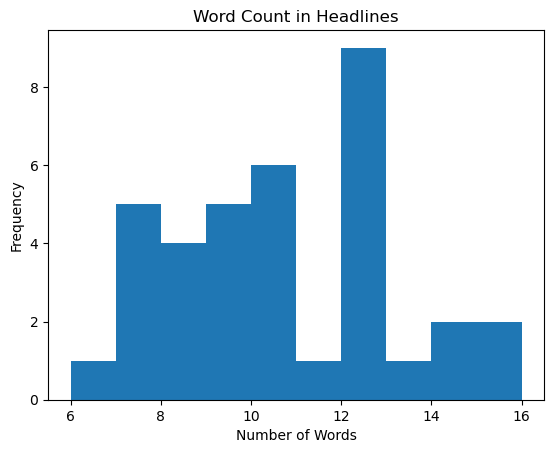

In [22]:
# Word count for each headline
word_count = text_news['Headline'].apply(lambda x: len(str(x).split(" ")))

# Create histogram
plt.hist(word_count)

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Word Count in Headlines')

# Display the plot
plt.show()

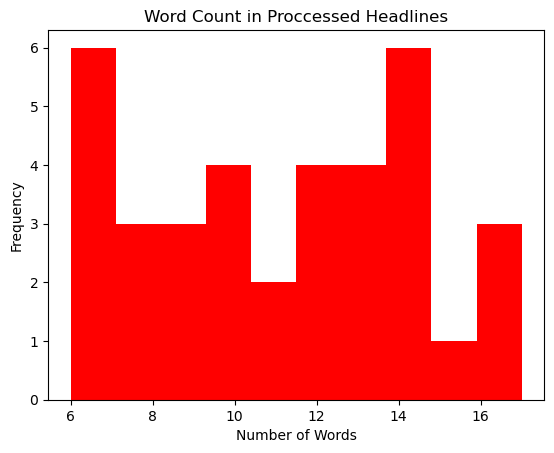

In [23]:
#count the number of words in each processed_headline
word_count = text_news['processed_headline'].apply(lambda x: len(str(x).split(" ")))
# Create histogram
plt.hist(word_count,color='red')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Word Count in Proccessed Headlines')

# Display the plot
plt.show()

### Most frequent words


In [24]:
from collections import Counter
import itertools

# Flatten the list of words in all headlines
all_words = list(itertools.chain.from_iterable(text_news['processed_headline']))

# Count all words
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common()

most_common_words


[(',', 14),
 ('supreme', 11),
 ('court', 11),
 ('house', 10),
 ('in', 9),
 ('bill', 7),
 ('a', 7),
 ('to', 6),
 ('mike', 5),
 ('of', 5),
 ('gop', 5),
 ('senate', 5),
 ('pence', 4),
 ('’', 4),
 ('endorse', 4),
 ('trump', 4),
 ('biden', 4),
 ('energy', 4),
 ("'s", 4),
 ('tiktok', 4),
 ('same-sex', 4),
 ('marriage', 4),
 ('college', 4),
 ('johnson', 4),
 ('speaker', 4),
 ('shutdown', 4),
 ('border', 4),
 ('for', 3),
 ('roe', 3),
 ('v.', 3),
 ('wade', 3),
 ('us', 3),
 ('passes', 3),
 ("'", 3),
 ('republicans', 3),
 ('ban', 3),
 ('nationwide', 3),
 ('with', 3),
 ('government', 3),
 ('deal', 3),
 ('aid', 3),
 ('he', 2),
 ('won', 2),
 ('t', 2),
 ('but', 2),
 ('vote', 2),
 ('say', 2),
 ('‘', 2),
 ("n't", 2),
 ('back', 2),
 ('ruling', 2),
 ('abortion', 2),
 ('decision', 2),
 ('the', 2),
 ('on', 2),
 ('dems', 2),
 ('pass', 2),
 ('chinese', 2),
 ('owner', 2),
 ('right', 2),
 ('bipartisan', 2),
 ('support', 2),
 ('admissions', 2),
 ('affirmative', 2),
 ('action', 2),
 ('admission', 2),
 ('after', 

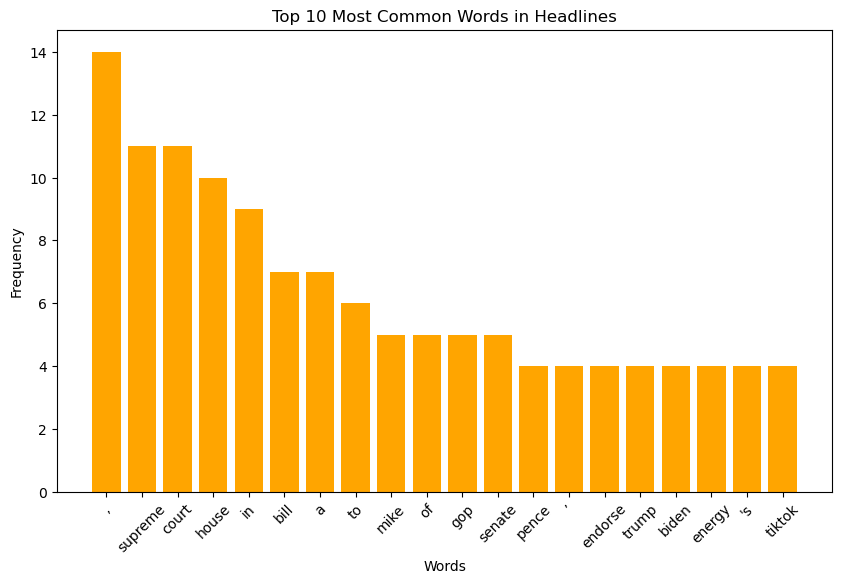

In [25]:
# Extract words and their counts
words, counts = zip(*most_common_words[:20])  # Adjust the number to plot more or fewer words

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color ='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Headlines')
plt.xticks(rotation=45)
plt.show()


In [26]:
#export as csv filter_left
filter_left.to_csv('filter_left.csv', index=False)

In [27]:
#get the descritive statistics of the filter_left similarities column
filter_left['Similarity'].describe()

count    9.000000
mean     0.720717
std      0.102385
min      0.560019
25%      0.657365
50%      0.727140
75%      0.799955
max      0.860911
Name: Similarity, dtype: float64

In [28]:
#export as csv filter_left
filter_right.to_csv('filter_right.csv', index=False)

In [29]:
#get the descritive statistics of the filter_left similarities column
filter_right['Similarity'].describe()

count    9.000000
mean     0.679724
std      0.129440
min      0.441741
25%      0.634364
50%      0.706774
75%      0.721333
max      0.880733
Name: Similarity, dtype: float64

In [30]:
#export as csv filter_left
filter_left_right.to_csv('filter_left_right.csv', index=False)

In [31]:
filter_left_right['Similarity'].describe()

count    36.000000
mean      0.696337
std       0.109086
min       0.441691
25%       0.621423
50%       0.713443
75%       0.773600
max       0.911476
Name: Similarity, dtype: float64

(array([1., 1., 0., 0., 2., 1., 2., 4., 2., 2., 2., 3., 3., 4., 1., 5., 1.,
        1., 0., 1.]),
 array([0.44169149, 0.4651807 , 0.48866993, 0.51215917, 0.53564835,
        0.55913758, 0.58262682, 0.606116  , 0.62960523, 0.65309447,
        0.67658365, 0.70007288, 0.72356212, 0.7470513 , 0.77054054,
        0.79402977, 0.81751895, 0.84100819, 0.86449742, 0.8879866 ,
        0.91147584]),
 <BarContainer object of 20 artists>)

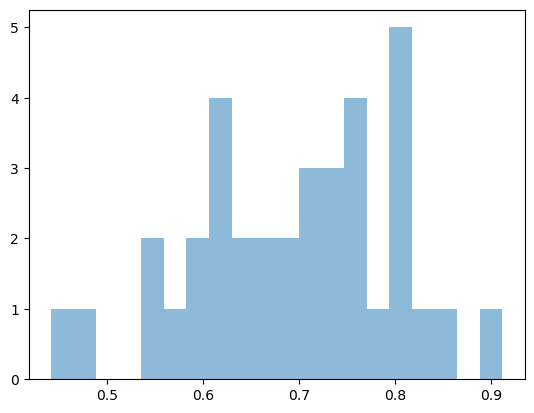

In [32]:
plt.hist(filter_left_right['Similarity'], bins=20, alpha=0.5, label='left')

In [33]:
#export as csv filter_left
score_df.to_csv('score_df.csv', index=False)